# Word Embedding으로 컴퓨터와 대화하기 
## FastText (+Word2Vec) 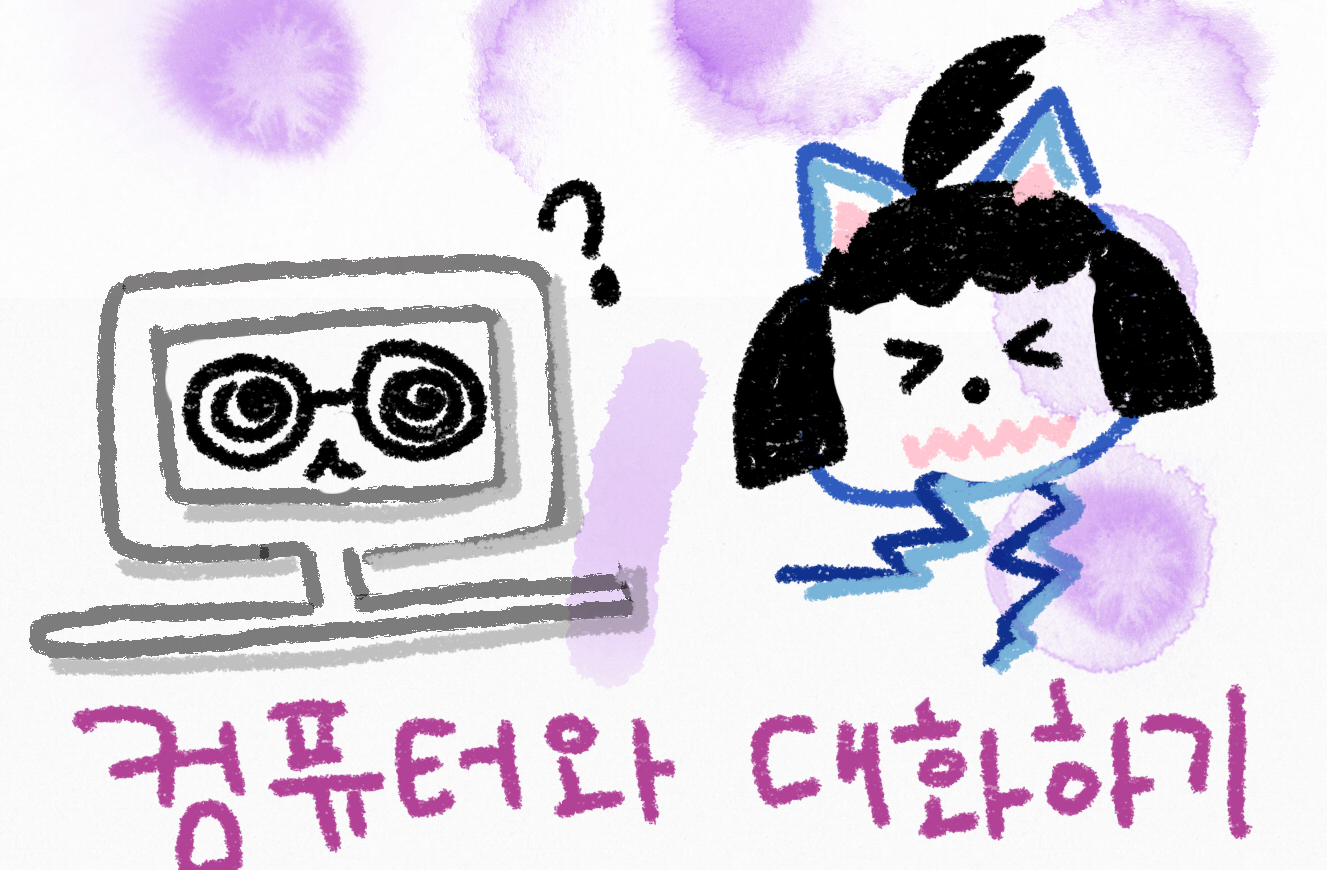


# Intro  
**목표**  
Word2Vec과 FastText 등 Word Embedding에 대해서 알아본다.

**다루는 것**  
개념, 활용 방법, 장/단점, 차이점 등

**다루지 않는 것**  
복잡한 수식, 난해한 표현

**들으면서 생각할 것들**  
어디에 활용하면 좋을까?

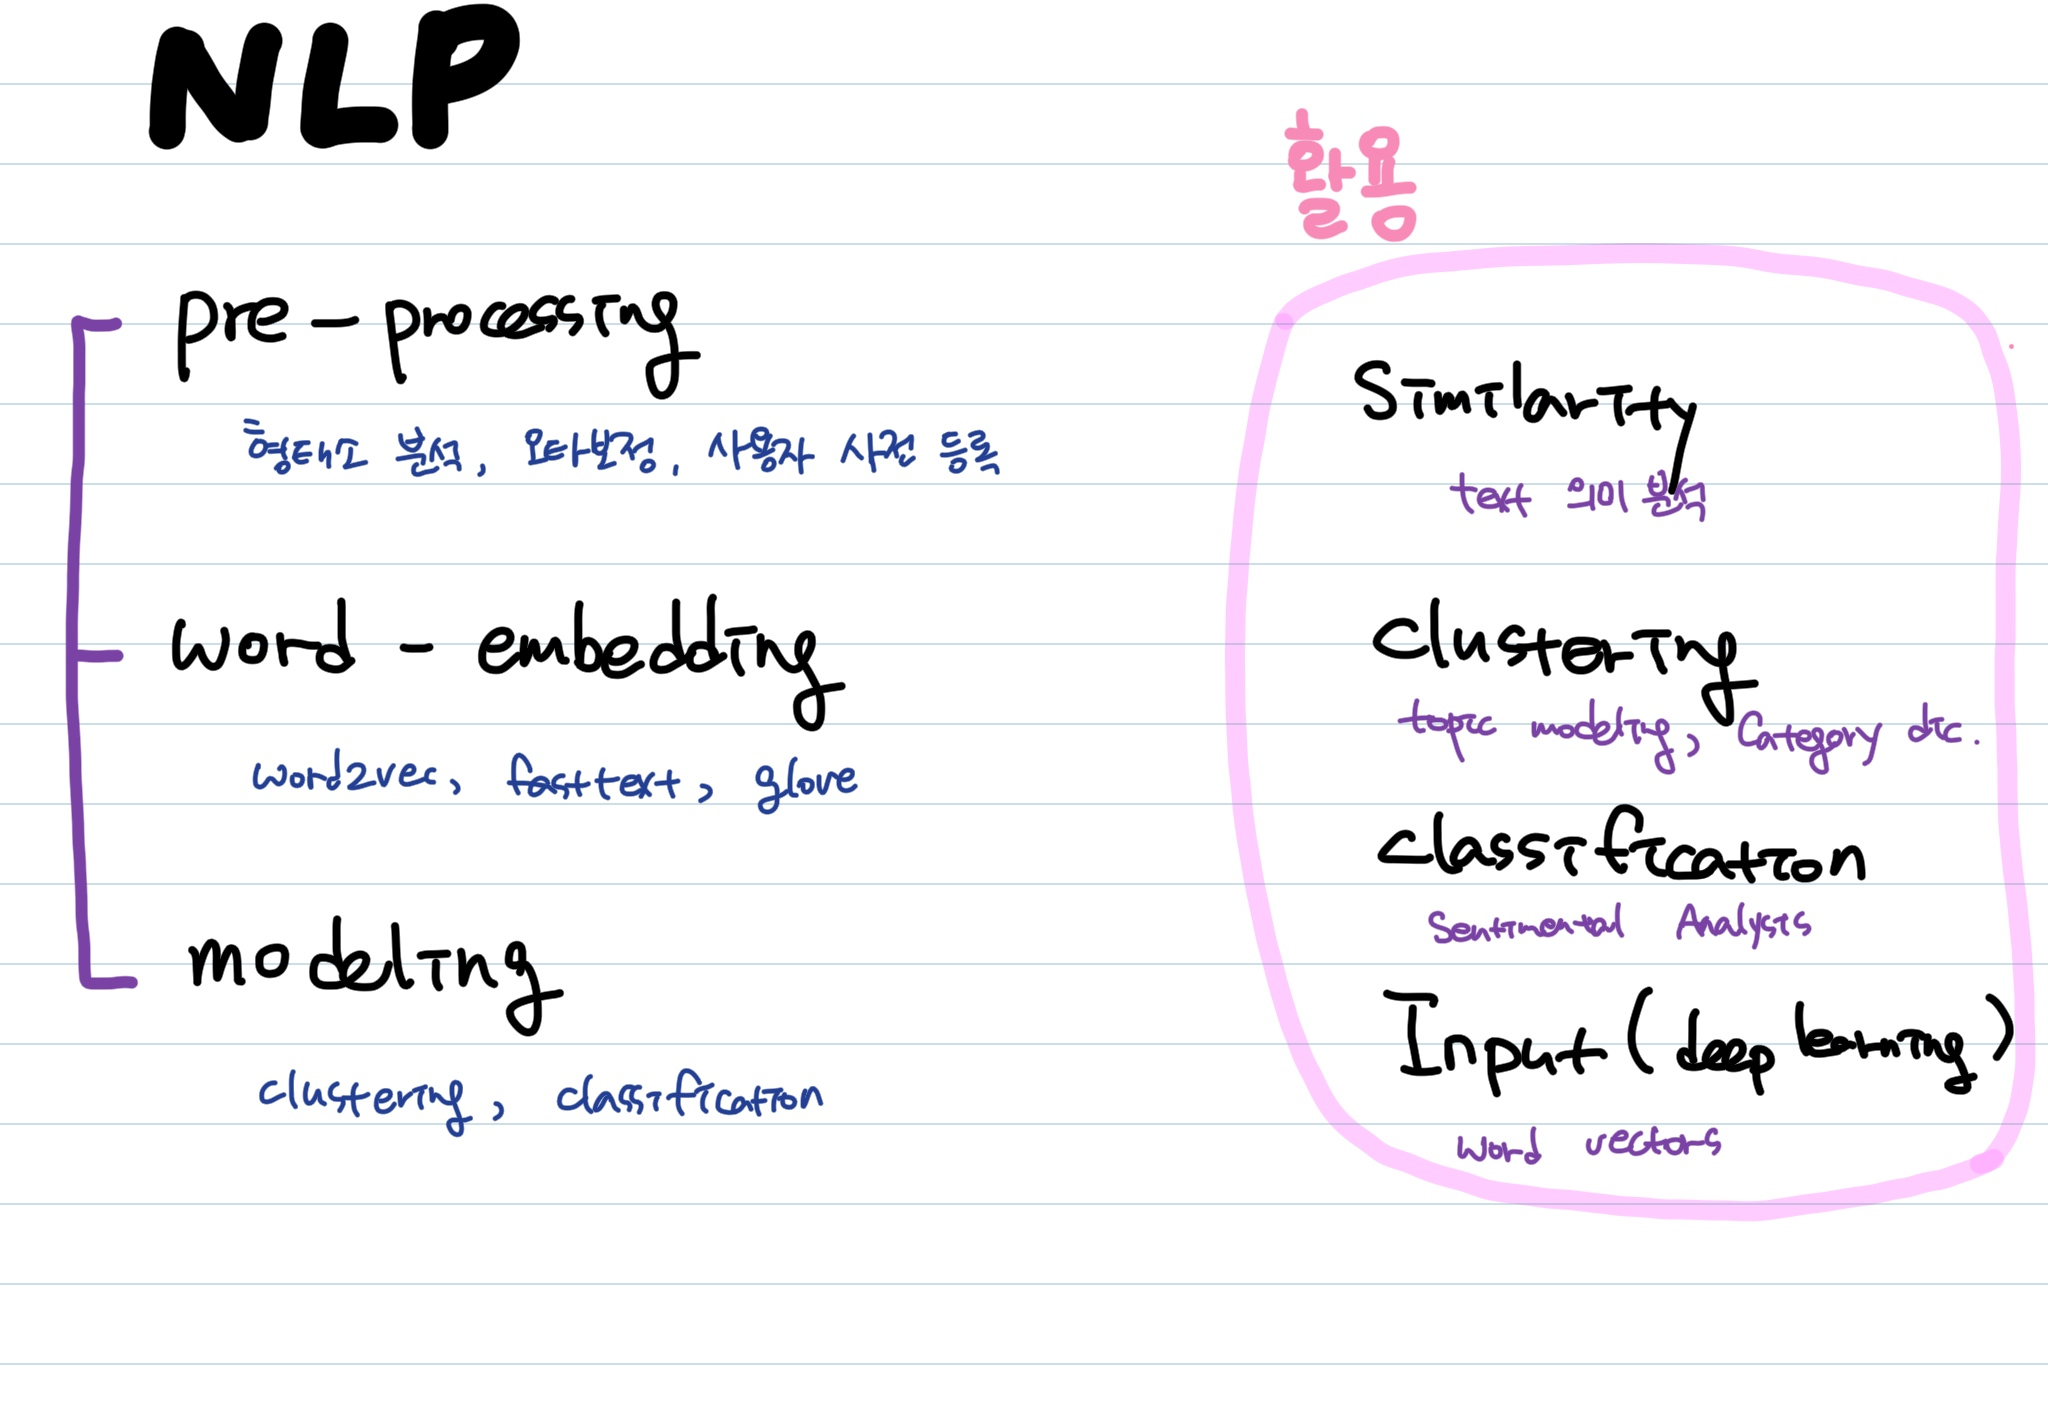

# Word Embedding

### Word Embedding 이란?

비정형화된 Text를 숫자로 바꿔줌으로써 사람의 언어를 컴퓨터의 언어로 번역하는 것 

**국소표현 (local representation)**  
- one-hot encoding : Text를 숫자로 바꿔주지만 단어간 유사도를 측정하기 어렵다
- TF-IDF : 단어가 문서에 (n번) 존재함을 기준으로 중요도를 구하고 단어 중요도의 가중합을 구함 (순서를 고려하지 않는 bag of words 방식)
- sparse, long vectors

**분산표현 (distributed representation)**  
- word2vec (google)
- fasttext (facebook)
- glove (stanford)
- dense, short vectors

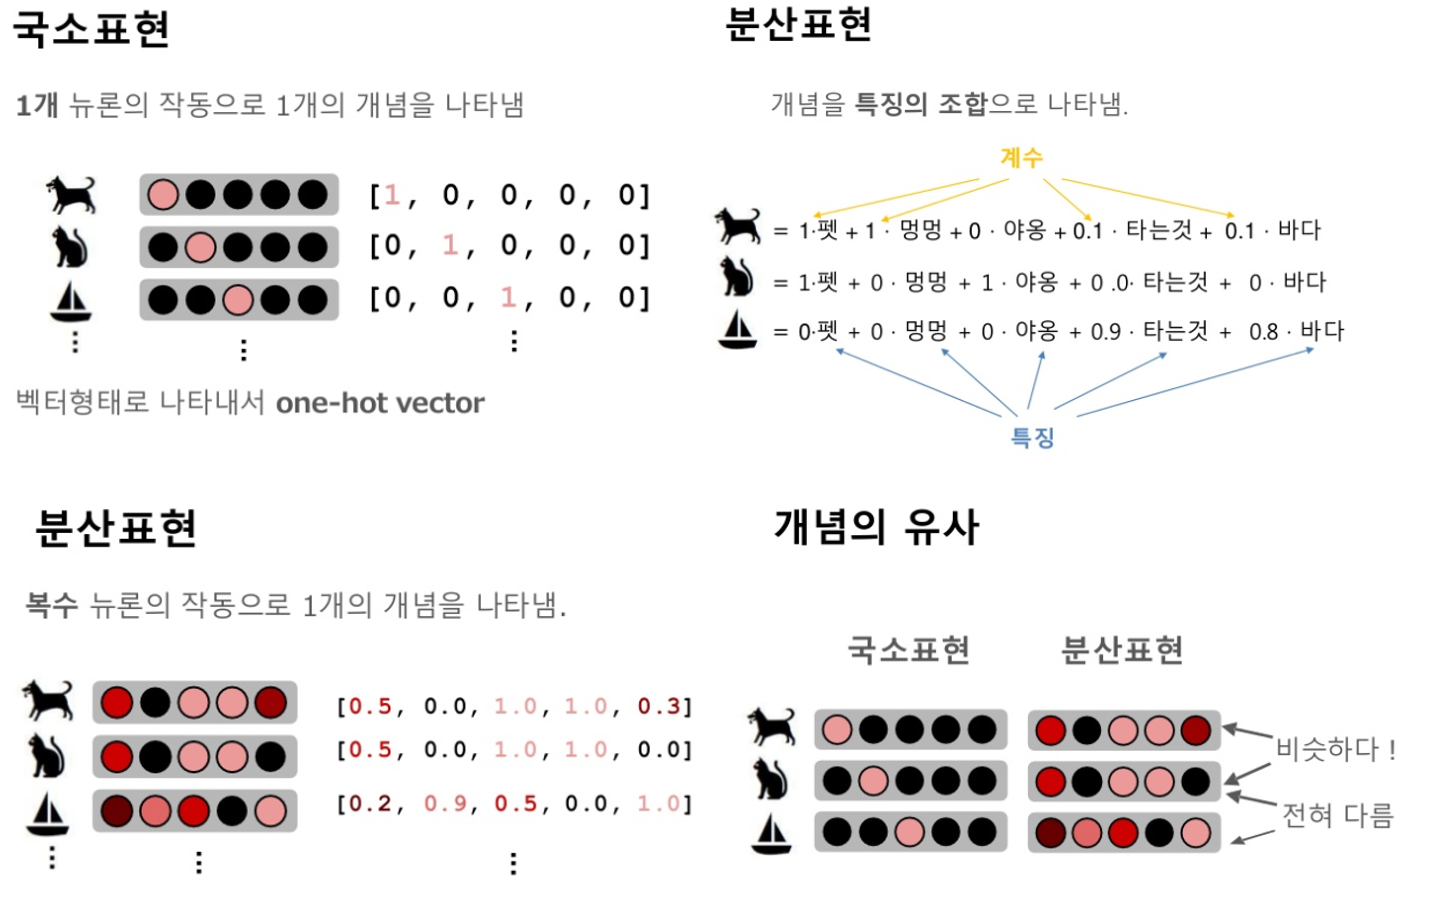

## 1. Word2Vec

(Tomas Mikolov. Distributed Representations of Words and Phrases and their Compositionality. In Proceedings of NIPS, 2013.)

**Distributional Hypothesis **  
- 두 단어의 문맥(주변 단어들)/분포도가 비슷하면 “의미적”으로 유사한 단어
- 예) 집 앞 편의점에서 아이스크림을 사 먹었는데, ___ 시려서 너무 먹기가 힘들었다.

**Word2Vec**
- Distributional Hyopthesis 기반으로 단어의 의미와 맥락을 고려하여 단어를 벡터로 표현하는 방법
- 주변단어(window) Size에 따라 말뭉치를 슬라이딩하면서 중심단어별의 주변단어들을 보고 각 단어의 벡터값을 업데이트 해나가는 방식으로 훈련
- window 내에 등장하지 않는 단어에 해당하는 벡터는 중심단어 벡터와 벡터공간상에서 멀어지게끔(내적값 줄이기), 등장하는 주변단어 벡터는 중심단어 벡터와 가까워지게끔(내적값 키우기) 값을 변경해 나감


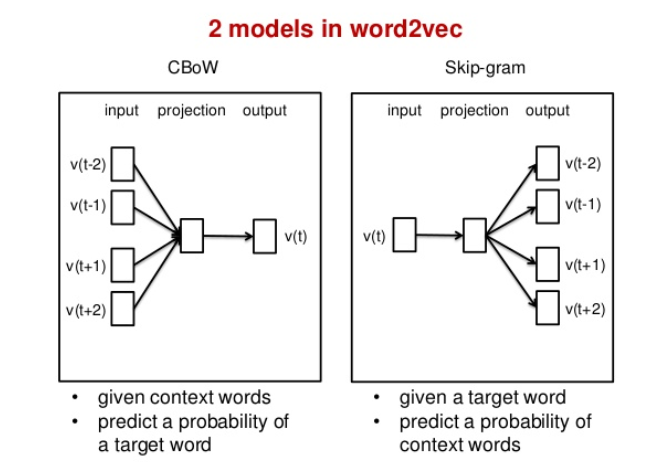

**CBoW & Skip-gram 예시**  

CBoW : 나는 향긋한 ---를 좋아한다.  
Skip-gram : --- 외나무다리에서 ---.

## Word2Vec으로 할 수 있는 것들
### 벡터 연산을 통한 추론
vector('Paris') - vector('France') + vector('Italy') = vector('Rome')
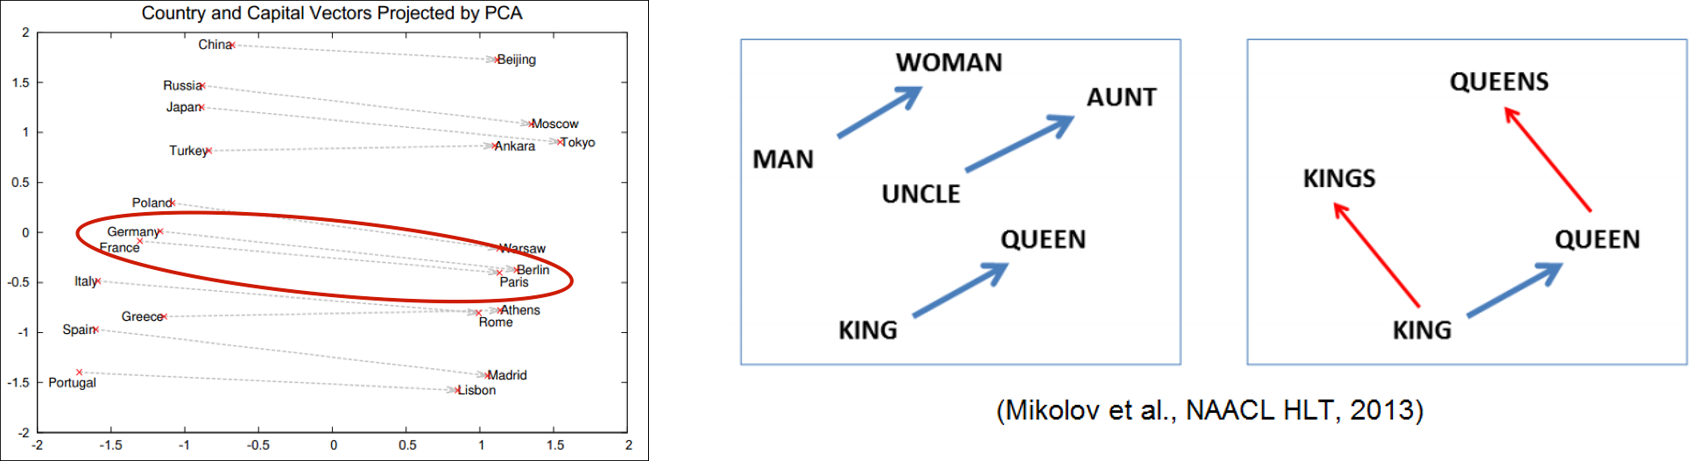

### Clustering
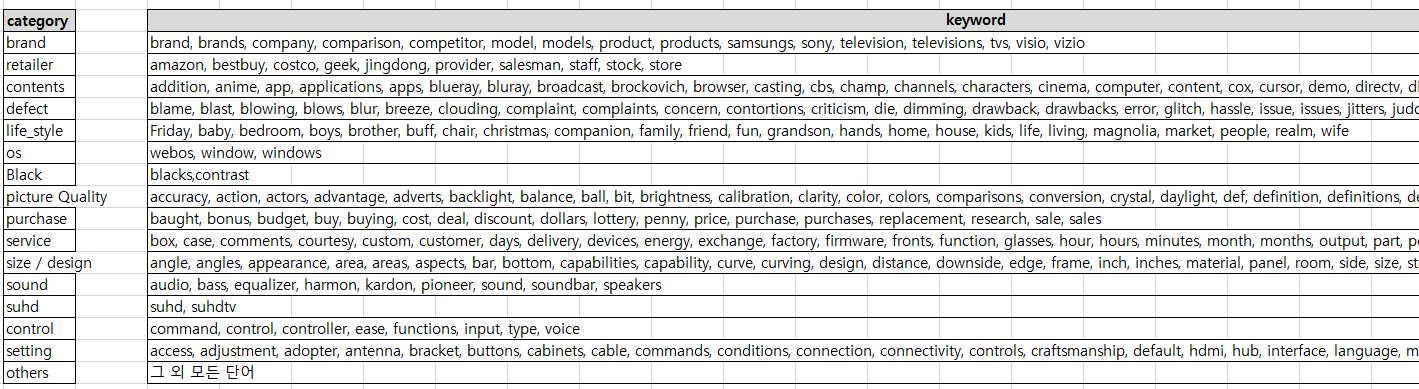

### Classification
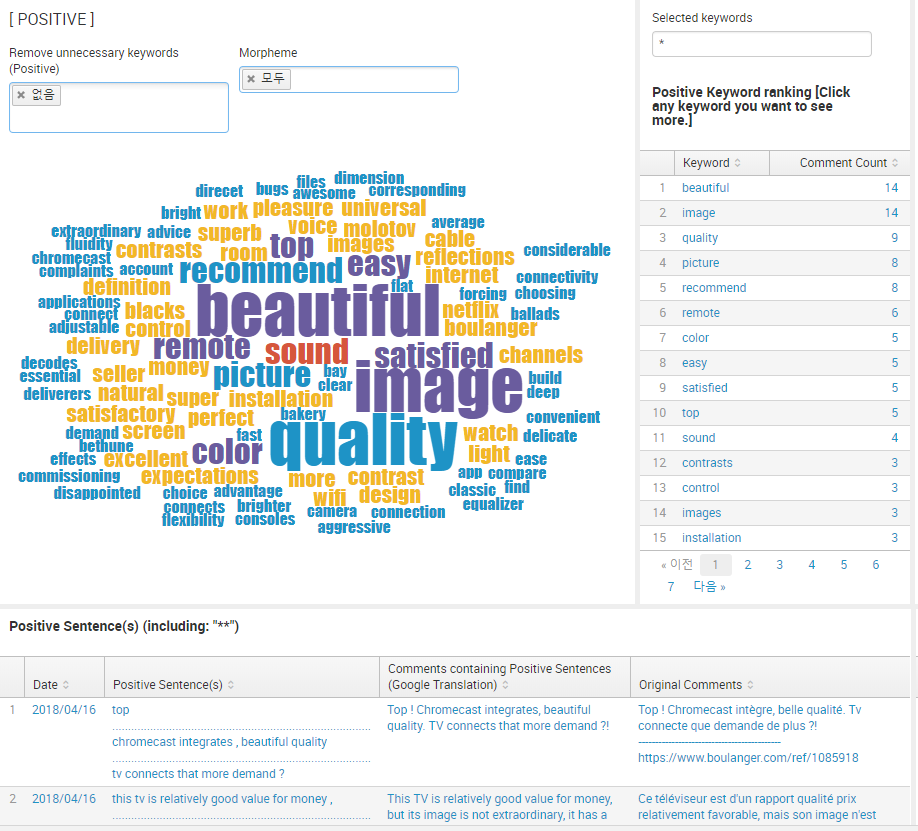

### Word2Vec의 한계점
- **단어의 형태학적 특성을 반영하지 못함**  
예를들어, teach와 teacher, teachers 세 단어는 의미적으로 유사한 단어임이 분명하다. 그런데 과거의 Word2Vec이나 Glove등과 같은 방법들은 이러한 단어들을 개별적으로 Embedding하기 때문에 셋의 Vector가 유사하게 구성되지 않는다.  
<br>
- **희소한 단어를 Embedding하기 어려움**  
Word2Vec등과 같은 기존의 방법들은 Distribution hypothesis를 기반으로 학습하는 것이기 때문에, 출현횟수가 많은 단어에 대해서는 잘 Embedding이 되지만, 출현횟수가 적은 단어에 대해서는 제대로 Embedding이 되지 않는다.  
(Machine learning에서, Sample이 적은 단어에 대해서는 Underfitting이 되는 것처럼)  
<br>
- **Out-of-Vocabulary(OOV)를 처리할 수 없는 단점**    
Word2Vec은 단어단위로 어휘집(Vocabulary)를 구성하기 때문에, 어휘집에 없는 새로운 단어가 등장하면 데이터 전체를 다시 학습시켜야 함  

## 2. FastText
**논문**  
1. Piotr Bojanowski, Edouard Grave, Armand Joulin, Tomas Mikolov. Enriching Word Vectors with Subword Information, 2016
2. Tomas Mikolov, Edouard Grave, Piotr Bojanowski, Christian Puhrsch, Armand Joulin. Advances in Pre-Training Distributed Word Representations, 2017


**Facebook에서 발표한 Word Embedding 기법으로 Word2vec과 비교하여 다음과 같은 차별점이 있음**

- Word embedding (Distributed vector represenatation of words)에는 다양한 방법이 있지만, 대부분의 방법들은 언어의 형태학적(Morpological)인 특성을 반영하지 못하고, 또 희소한 단어에 대해서는 Embedding이 되지 않음
- 본 연구에서는 단어를 Bag-of-Characters로 보고, 개별 단어가 아닌 n-gram의 Charaters를 Embedding함 (Skip-gram model 사용)
- 최종적으로 각 단어는 Embedding된 n-gram의 합으로 표현됨, 그 결과 빠르고 좋은 성능을 나타냈음

# FastText Example

### 1. Pre-trained FastText
아래 링크에서 wikipedia 데이터 기반으로 학습된 전세계 294개 언어로 된 pre-trained fastText를 제공하고 있음  
(parameter : 300 dimension, skip-gram model)  
한국어의 경우 wiki.ko.bin / wiki.ko.vec 파일  
https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md  


Pre-trained 된 FastText는 fastText API 또는 Gensim 을 이용하여 로드해서 활용

In [1]:
from __future__ import print_function
from gensim.models import KeyedVectors

# Creating the model
ko_model = KeyedVectors.load_word2vec_format('wiki.ko.vec')


In [2]:
# Getting the tokens 
words = []
for word in ko_model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(ko_model[words[0]])
))

# Print out the vector of a word 
print("Vector components of a word: {}".format(
    ko_model[words[0]]
))

print(words[0])

Number of Tokens: 879129
Dimension of a word vector: 300
Vector components of a word: [ 4.0987e-01  5.3006e-03 -1.5832e+00 -1.0234e+00  2.7239e-01 -1.2325e+00
 -2.8500e-01 -5.9057e-01 -7.1622e-01 -7.8779e-01  4.6649e-02  3.1382e-01
 -4.1487e-01 -9.1984e-01 -3.0980e-01 -1.5516e-01  8.1917e-02 -8.8866e-01
 -2.6710e-02 -7.6736e-01  1.0054e+00 -2.7689e-01  6.0095e-01 -6.6004e-02
  5.7456e-01  6.7092e-01 -1.4202e-01  3.1292e-01 -8.1834e-01  3.1503e-01
  8.6697e-01 -9.3468e-01 -1.0193e+00  3.2536e-01 -6.4223e-01 -7.6901e-01
 -1.3965e+00 -1.2300e+00 -2.8656e-01 -3.4853e-01  1.0772e+00  1.2494e+00
  3.3720e-01 -7.6690e-01  6.3737e-01 -4.4553e-01  5.1555e-01 -3.8258e-01
  8.6264e-01 -6.9718e-01  1.4699e+00  6.7000e-01 -1.2923e+00 -1.0476e-01
  9.5305e-01  4.7174e-02  1.0691e+00  6.5087e-01  1.4713e+00 -8.3216e-01
  7.1885e-01  1.8395e+00 -4.4246e-01  3.1631e-01  7.3043e-02 -1.9448e+00
  1.0989e+00 -2.6499e+00  1.2871e+00 -1.2371e-01 -6.1374e-01  2.7363e-01
 -4.9095e-01  6.3166e-01 -5.0715e-01  

In [3]:
words[50]

'가'

pre-trained 된 fastText 모델로 단어간 유사도 검색을 할 수 있다

In [4]:

# Pick a word 
find_similar_to = '사랑'

# Finding out similar words [default= top 10]
for similar_word in ko_model.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))



Word: 사랑사랑, Similarity: 0.81
Word: 사랑치, Similarity: 0.78
Word: 사랑일, Similarity: 0.77
Word: 사랑느낌, Similarity: 0.76
Word: 사랑이었네, Similarity: 0.76
Word: 사랑이여, Similarity: 0.75
Word: 사랑병, Similarity: 0.75
Word: 사랑인, Similarity: 0.75
Word: 사랑맛, Similarity: 0.75
Word: 사랑노래, Similarity: 0.74


In [5]:
# Test words 
word_add = ['동물', '파충류']
word_sub = ['뱀']

# Word vector addition and subtraction 
for resultant_word in ko_model.most_similar(
    positive=word_add, negative=word_sub
):
    print("Word : {0} , Similarity: {1:.2f}".format(
        resultant_word[0], resultant_word[1]
    ))


Word : 포유류 , Similarity: 0.72
Word : 포유동물 , Similarity: 0.71
Word : 절지동물 , Similarity: 0.69
Word : 양서류 , Similarity: 0.69
Word : 독동물 , Similarity: 0.69
Word : 포유류분류 , Similarity: 0.68
Word : 무척추동물 , Similarity: 0.68
Word : 척추동물분류 , Similarity: 0.68
Word : 도시동물 , Similarity: 0.68
Word : 동물상 , Similarity: 0.67


## **Visualization**  
wi.ko.vec에 저장된 88만여개 단어 중 선두 300개 단어를 2차원 상에 맵핑하면 다음과 같은 그림이 보여짐

/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


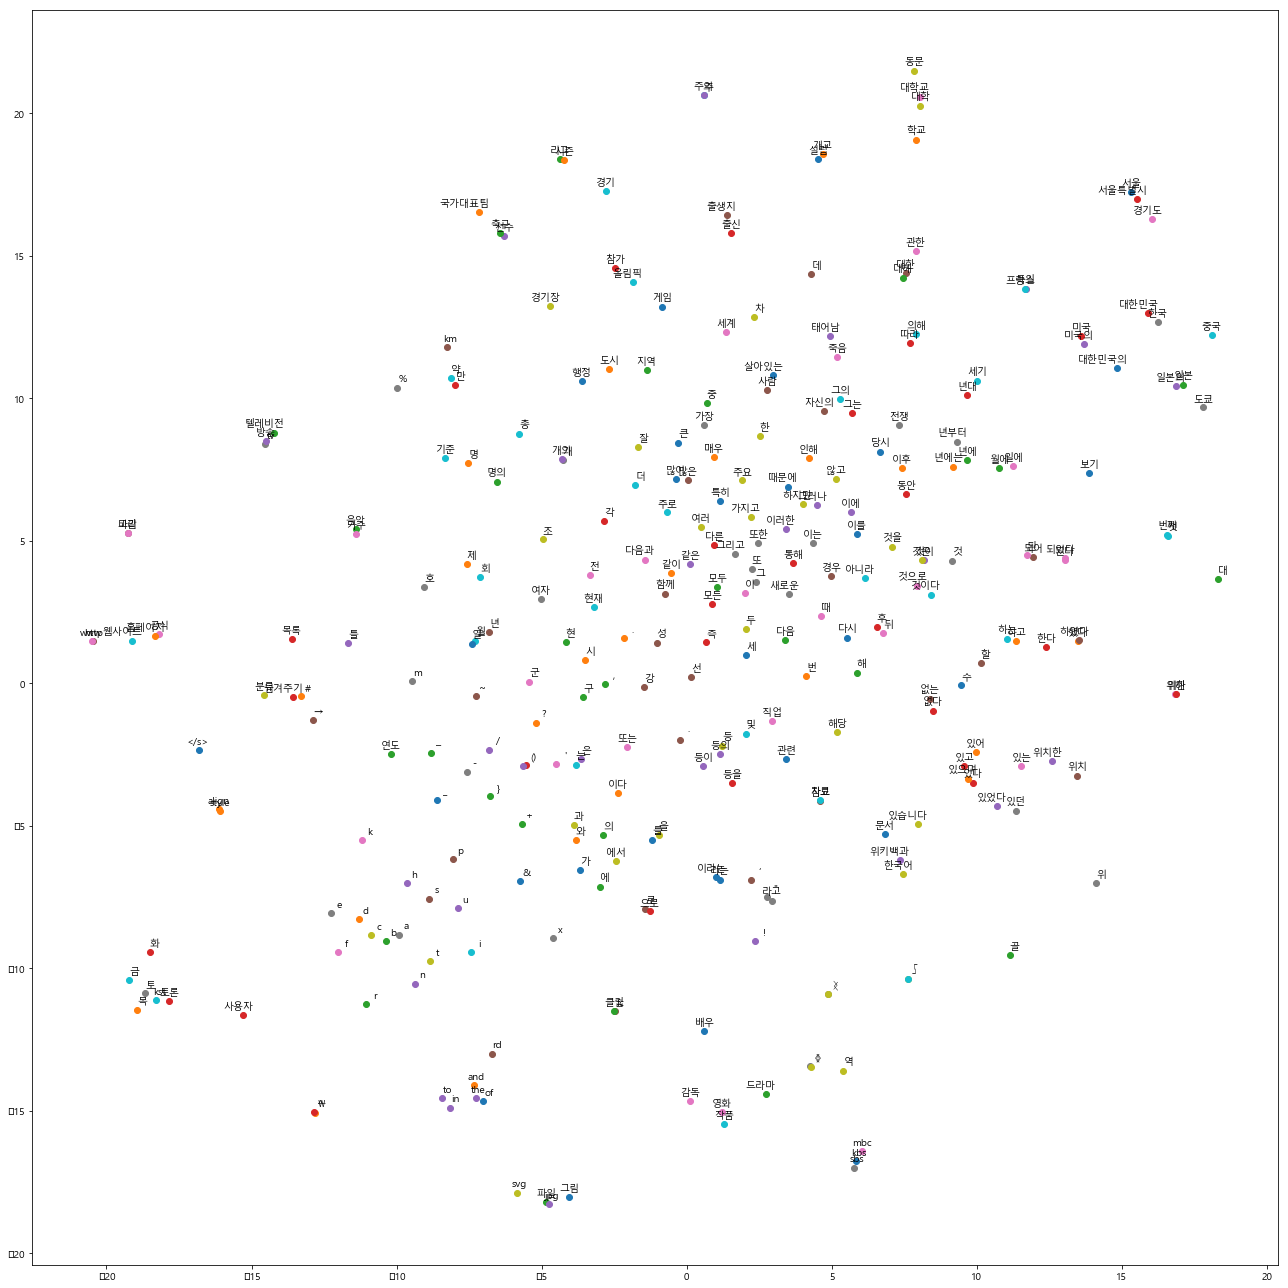

In [6]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/MALGUN.TTF").get_name()
rc('font', family=font_name)
rcParams.update({'figure.autolayout': True})
%matplotlib inline

# Limit number of tokens to be visualized
limit = 300
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in ko_model.vocab:
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, ko_model[word])

    i += 1

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(10, 4),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)

In [7]:
similarities = ko_model.wv.most_similar(positive=['동물', '파충류'], negative=['뱀'])
print(similarities)

not_matching = ko_model.wv.doesnt_match("아침 점심 저녁 된장국".split())
print(not_matching)

sim_score = ko_model.wv.similarity('컴퓨터', '인간')
print(sim_score)

sim_score = ko_model.wv.similarity('로봇', '인간')
print(sim_score)

sim_score = ko_model.wv.similarity('사랑해', '사랑의')
print(sim_score)

print(ko_model.wv.most_similar('전자'))

[('포유류', 0.7234190702438354), ('포유동물', 0.7082793712615967), ('절지동물', 0.6905428171157837), ('양서류', 0.6887608766555786), ('독동물', 0.6857677698135376), ('포유류분류', 0.6800143718719482), ('무척추동물', 0.6791884899139404), ('척추동물분류', 0.6789263486862183), ('도시동물', 0.6775411367416382), ('동물상', 0.6730656623840332)]
된장국
0.42482013475966973
0.4782262080863405
0.5480147143801912
[('전자빔', 0.7568391561508179), ('전자렌지', 0.7566049098968506), ('전자기기', 0.7503113746643066), ('전자양', 0.7480576634407043), ('가전자', 0.7460261583328247), ('전자악기', 0.7431635856628418), ('전자기기와', 0.7412865161895752), ('전자기계', 0.7339802980422974), ('전자만', 0.7331153154373169), ('전자적인', 0.7289555072784424)]


/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarni

### 2. Self-trained FastText by FastText API
https://github.com/facebookresearch/fastText

```
$ git clone https://github.com/facebookresearch/fastText.git
$ cd fastText
$ mkdir build && cd build && cmake ..
$ make && make install
```

**fastText 내의 word-vector-example.sh / classification-example.sh 파일 참고**  
- word vector 만들기  
./fasttext skipgram -input input.txt -lr 0.025 -dim 100 -ws 5 -epoch 1 -minCount 5 -neg 5 -loss ns -bucket 2000000 -minn 3 -maxn 6 -thread 4 -t 1e-4 -lrUpdateRate 100  
<br>
- classification 모델 만들기  
./fasttext supervised -input input.txt -output "output.bin" -dim 10 -lr 0.1 -wordNgrams 2 -minCount 1 -bucket 10000000 -epoch 5 -thread 4  
 
**Similar Words 계산**  
```
$ : ./fasttext nn model.bin  
```  
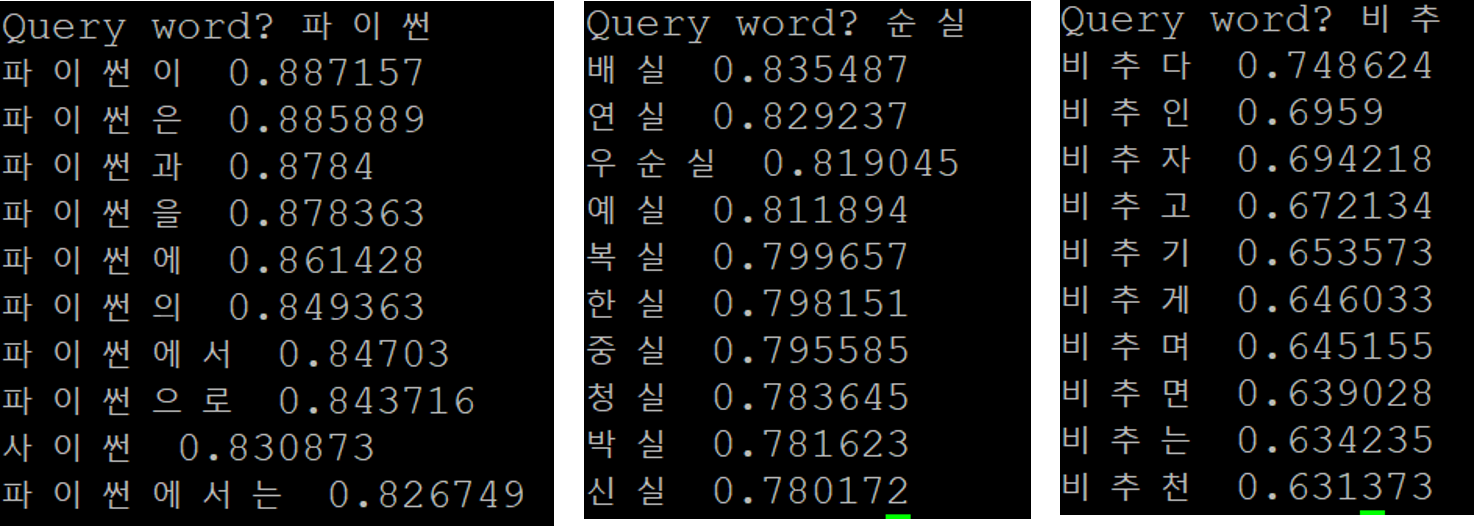

**classificatoin 모델로 예측하기**  
```
$ ./fasttext test "model.bin" "test.txt"
$ ./fasttext supervised -input cooking.train -output model_cooking -lr 1.0 -epoch 25 -wordNgrams 2
$ ./fasttext test model_cooking.bin cooking.valid
```
- changing the number of epochs (using the option -epoch, standard range (5 - 50)
- changing the learning rate (using the option -lr, standard range (0.1 - 1.0)
- using word n-grams (using the option -wordNgrams, standard range (1 - 5)

### 3. Self-trained FastText by Gensim
참고 : https://radimrehurek.com/gensim/models/fasttext.html  
파이썬 Gensim 패키지를 통해서 fastText 모델을 만들 수 있다.  
Gensim 패키지를 이용하면 fastText 모델을 word2vec format으로 변형해서 로드할 수 있어서 기존 word2vec api를 사용할 수도 있고, 다른 모델링(deep learning 등)의 input 형태로 변환하기도 수월해진다.

In [8]:
from gensim.test.utils import common_texts
from gensim.models import FastText

ft_model = FastText(common_texts, size=4, window=3, min_count=1, iter=10)

In [9]:
common_texts[:5]

similarities = ft_model.wv.most_similar(positive=['computer', 'human'], negative=['interface'])
most_similar = similarities[0]
print(most_similar)

not_matching = ft_model.wv.doesnt_match("human computer interface tree".split())
print(not_matching)

sim_score = ft_model.wv.similarity('computer', 'human')
print(sim_score)

sim_score = ft_model.wv.similarity('computer', 'interface')
print(sim_score)

('graph', 0.8366204500198364)
tree
-0.13334978210321657
0.003142370718195925


### 우리 도메인 데이터로 학습된 FastText 모델을 만들어보자

**Self-trained FastText**  
- 데이터 : 한국어 crawling data 41만건 + IMS 이슈 데이터 5만4천여건 + Issue Monitoring 이슈 2천여건 + PL 데이터 3만여건
- Parameter : skipgram , -lr 0.025 , -dim 300 , -ws 5 , -epoch 20 , -lrUpdateRate 100

**The following arguments for the dictionary are optional:**  
- -minCount : minimal number of word occurences  
- -minCountLabel : minimal number of label occurences   
- -wordNgrams : max length of word ngram  
- -bucket : number of buckets   
- -minn : min length of char ngram   
- -maxn : max length of char ngram   
- -t : sampling threshold   
- -label : labels prefix

**The following arguments for training are optional:**  
- -lr : learning rate 
- -lrUpdateRate : change the rate of updates for the learning rate 
- -dim : size of word vectors
- -ws : size of the context window
- -epoch : number of epochs
- -neg : number of negatives sampled
- -loss : loss function {ns, hs, softmax}
- -thread : number of threads
- -pretrainedVectors : pretrained word vectors for supervised learning
- -saveOutput : whether output params should be saved
  



self-trained fastText with LG Data
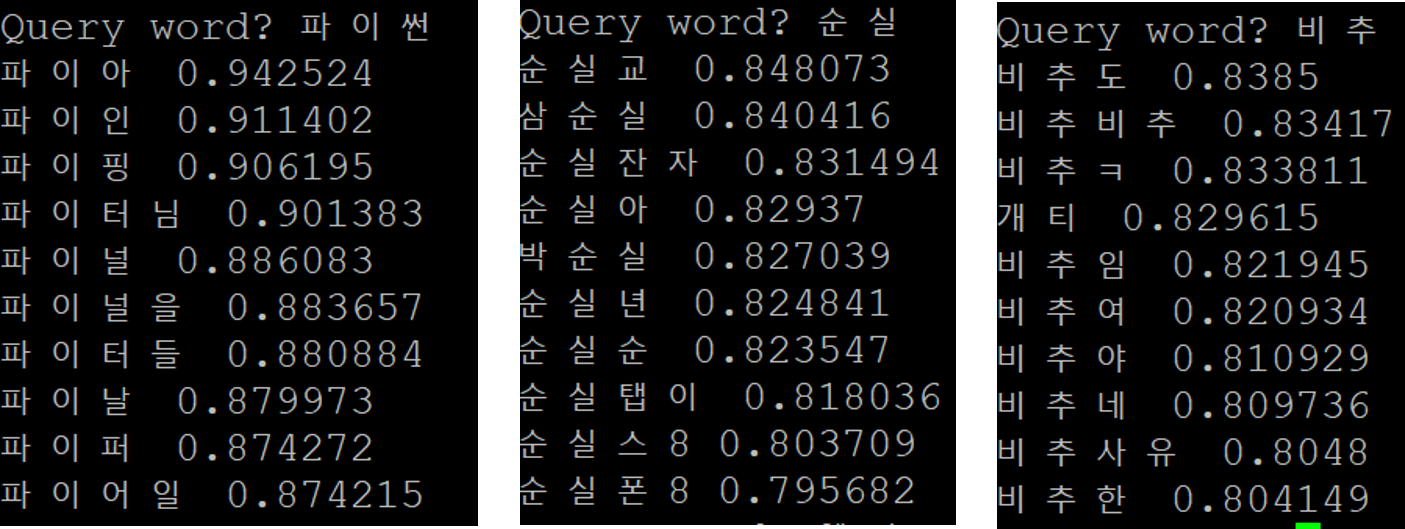

### Word2Vec VS FastText


In [10]:
import gensim

# Creating the model
ko_w2v = gensim.models.Word2Vec.load('ko.bin') # load word2vec model


In [11]:
print(ko_w2v.most_similar(positive=["전자"], topn=10))

similarities_wv = ko_w2v.most_similar(positive=['동물', '파충류'], negative=['뱀'])
print(similarities_wv)

sim_score_wv = ko_model.similarity('컴퓨터', '인간')
print(sim_score_wv)

sim_score_wv = ko_model.similarity('로봇', '인간')
print(sim_score_wv)

[('반도체', 0.6502741575241089), ('양전자', 0.6052197217941284), ('복사기', 0.5808517336845398), ('음전하', 0.5768587589263916), ('원자가', 0.5756815671920776), ('음극', 0.5747135281562805), ('양전하', 0.5658353567123413), ('절연체', 0.5621837377548218), ('상거래', 0.5594459772109985), ('광자', 0.5468275547027588)]
[('생물', 0.6952868700027466), ('영장류', 0.6766470670700073), ('조류', 0.6660945415496826), ('양서류', 0.6637342572212219), ('포유류', 0.659113347530365), ('설치류', 0.636635422706604), ('무척추', 0.6241835355758667), ('어류', 0.6236225366592407), ('절지', 0.6208628416061401), ('곤충', 0.6167744398117065)]
0.42482013475966973
0.4782262080863405


/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/younkyung.jang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


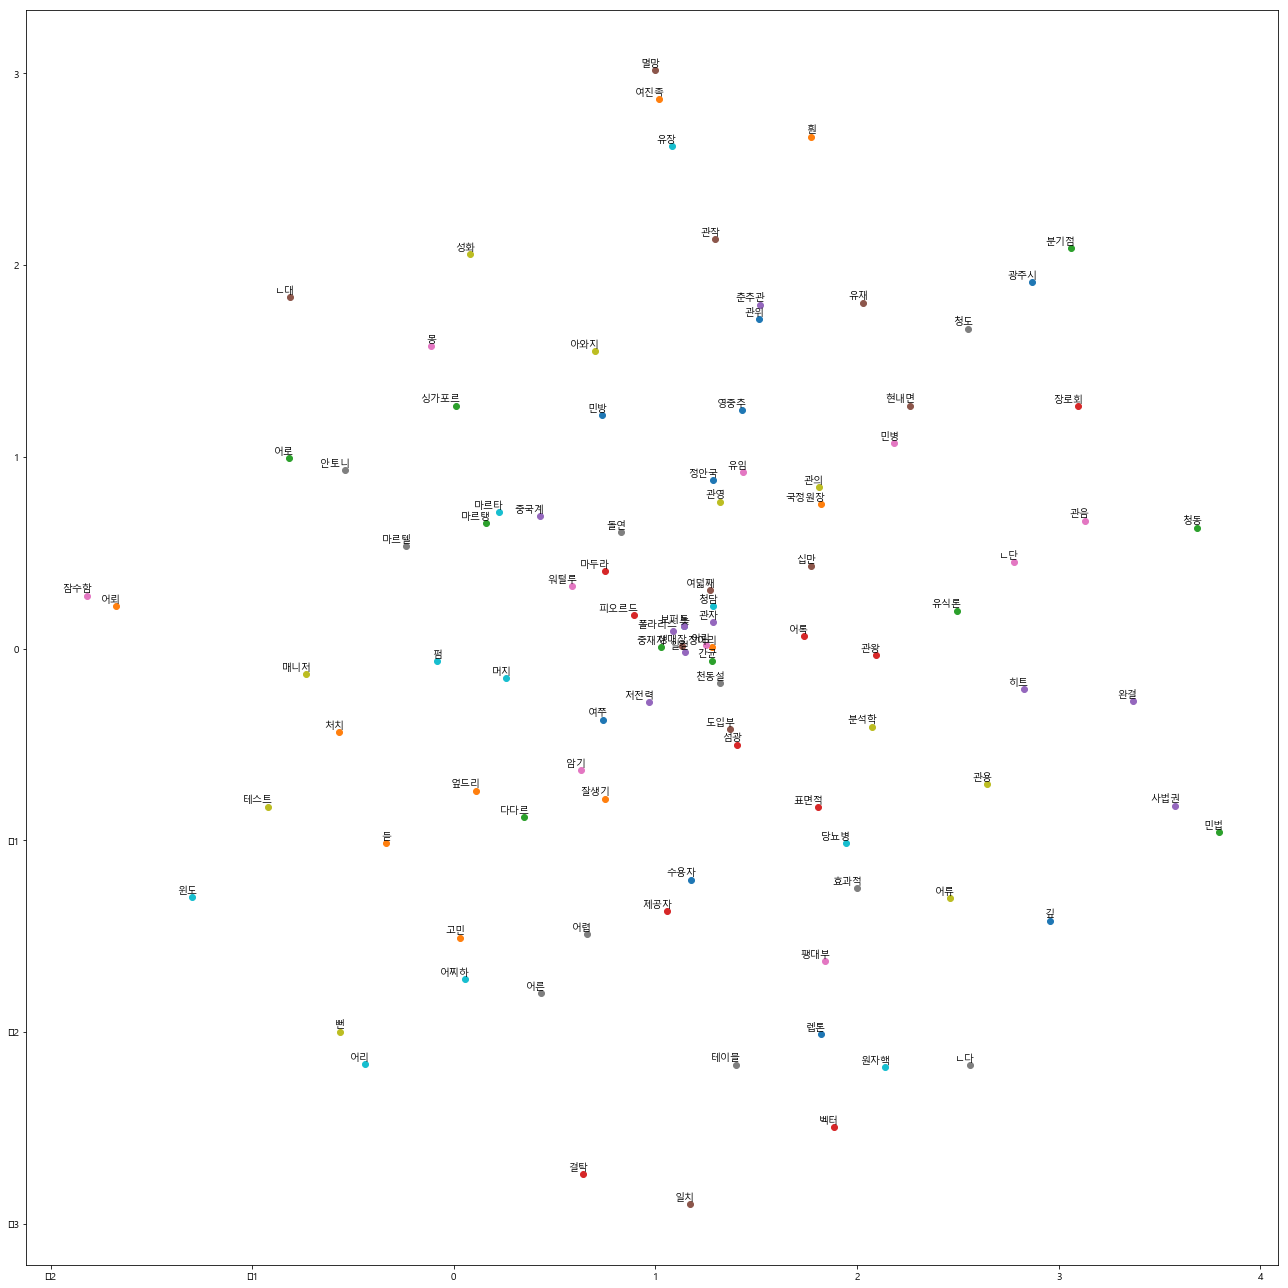

In [12]:

# Limit number of tokens to be visualized
limit = 100
vector_dim = 200

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in ko_w2v.wv.vocab:
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, ko_w2v[word])

    i += 1

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)

# In Practice

**장점**  
- 노이즈가 많은 댓글 데이터에서는 word2vec보다 fastText의 성능이 더 좋았음
- Word2vec의 경우 오타 또는 줄임말 경우에 out of vocabulary 문제가 생김 ex) 재미업다. 잇어요..


**단점**  
- distribution hyopthesis 기반으로 학습된 모델이기 때문에 의미상 아무런 관련이 없는 단어임에도 벡터 공간이 가깝게 임베딩 됨
- 과일 가게에 --를 사러 갔다. => 사과, 바나나, 귤, 복숭아 등

- 사과, 바나나, 귤, 복숭아 등은 문맥상으로는 다른 단어이지만 문법적으로 근접하다면 similarity가 높은 유사도로 계산되어 진다.
- 따라서 카테고리 사전, topic clustering으로 할 때 완전 자동화 할 수는 없고 filtering 수작업이 필요하다.

## Rerefence
https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/03/11/embedding/  
https://www.lucypark.kr/docs/2015-pyconkr/#37
    